__Data Set Information__:

_This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other._

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica



## Importing all the required libraries

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn.datasets import load_iris

#For Logistic Regression
from sklearn.linear_model import LogisticRegression

#For random forest
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

#For XGBoost
from xgboost import XGBClassifier

import pandas_profiling as pp

## Loading the Iris Dataset

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
report = pp.ProfileReport(df)
report.to_file('profile_report_iris.html')

In [9]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Exploratory Data Analysis

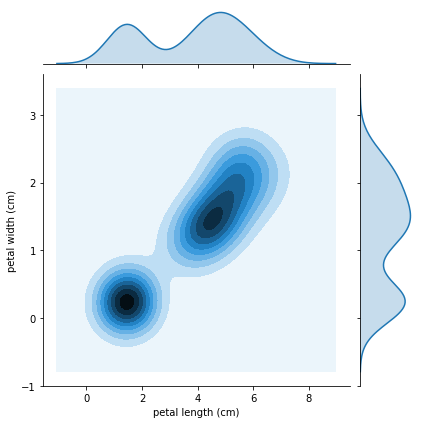

In [11]:
sns.jointplot(x = 'petal length (cm)', y = 'petal width (cm)', data = df, kind= 'kde')

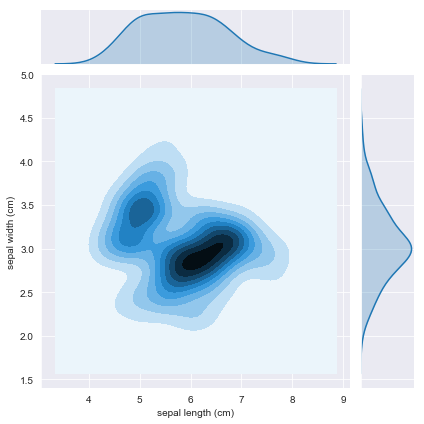

In [12]:
sns.set_style("darkgrid")
sns.jointplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, kind= 'kde')


## Splitting the training and testing data

In [13]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [14]:
train, test = df[df["is_train"]== True], df[df['is_train']==False]
print('The training data:',len(train))
print('The testing data:',len(test))

The training data: 118
The testing data: 32


In [15]:
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [24]:
yy = pd.factorize(train['species'])[0]
yy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Logistic Regression

In [17]:
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [18]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
model1.score(X_test, y_test)

0.9666666666666667

In [20]:
pred1 = model1.predict(X_test)

In [21]:
from sklearn import metrics
print(metrics.classification_report(pred1, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



## Random Forest Classifier

In [27]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features],yy)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
ypred = clf.predict(test[features])
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [29]:
# Checks the probability of each outcome
# clf.predict_proba(test[features])[0:10]

In [30]:
preds = iris.target_names[clf.predict(test[features])]

In [31]:
preds[:35]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [32]:
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [33]:
pd.crosstab(test['species'],preds,rownames=['Actual Species'],colnames = ['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [34]:
y2 = pd.factorize(test['species'])[0]
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [35]:
from sklearn import metrics
print(metrics.classification_report(ypred, y2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      1.00      0.83         5
           2       1.00      0.86      0.92        14

   micro avg       0.94      0.94      0.94        32
   macro avg       0.90      0.95      0.92        32
weighted avg       0.96      0.94      0.94        32



### Generating Confusion Matrix for Random Forest

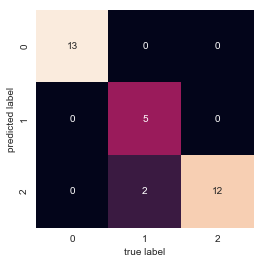

In [36]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# XGBoost

In [37]:
model4 = XGBClassifier()
model4.fit(train[features],yy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [38]:
pred4 = model4.predict(test[features])

In [39]:
pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [40]:
from sklearn import metrics
print(metrics.classification_report(pred4, y2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      1.00      0.83         5
           2       1.00      0.86      0.92        14

   micro avg       0.94      0.94      0.94        32
   macro avg       0.90      0.95      0.92        32
weighted avg       0.96      0.94      0.94        32



### Generating Confusion Matrix for XGBoost

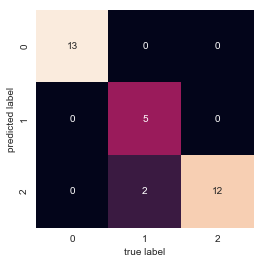

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, pred4)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## All the models together:

In [43]:
from sklearn.metrics import accuracy_score
print('The accuracy of Logistic Regression is', accuracy_score(pred1, y_test))
print('The accuracy of Random Forest is',accuracy_score(ypred, y2))
print('The accuracy of XGBoost is',accuracy_score(pred4,y2))

The accuracy of Logistic Regression is 0.9666666666666667
The accuracy of Random Forest is 0.9375
The accuracy of XGBoost is 0.9375
